In [36]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from prettytable import PrettyTable

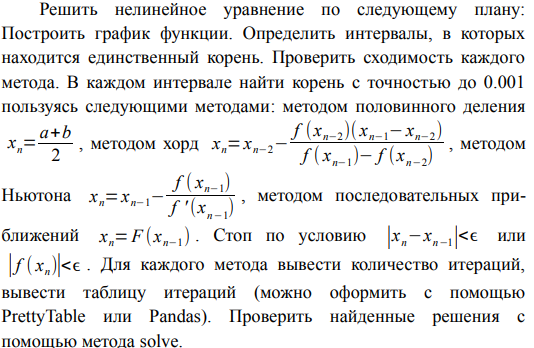

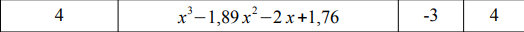

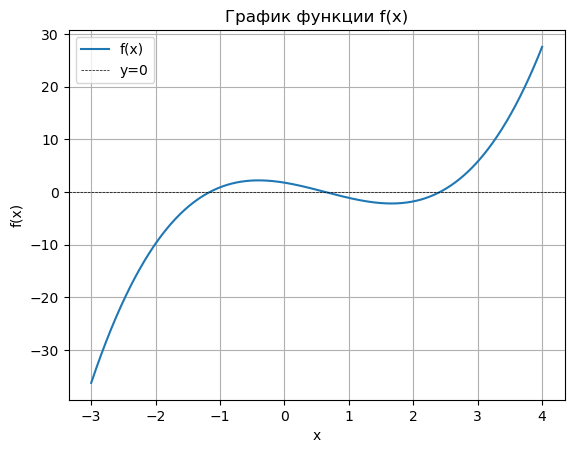

In [37]:
x = sp.symbols('x')
f = x**3 - 1.89*x**2 - 2*x + 1.76
f_func = sp.lambdify(x, f, 'numpy')
df = sp.diff(f, x)
x_values = np.linspace(-3, 4, 1000)
y_values = f_func(x_values)
plt.plot(x_values, y_values, label='f(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', label='y=0')
plt.title('График функции f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
def bisection_method(func, a, b, epsilon=1e-3, max_iter=100):
    func_lambda = sp.lambdify(x, func, 'numpy')
    a, b = float(a), float(b)

    iterations = 0
    while abs(b - a) > epsilon and iterations < max_iter:
        c = (a + b) / 2
        if func_lambda(a) * func_lambda(c) < 0:
            b = c
        else:
            a = c
        iterations += 1

    return (a + b) / 2, iterations


def chord_method(func, a, b, epsilon=1e-3, max_iter=100):
    func_lambda = sp.lambdify(x, func, 'numpy')
    a, b = float(a), float(b)

    x0 = (a + b) / 2
    x_i, x_prev, iterations = x0, x0 + 2 * epsilon, 0

    while iterations < max_iter and abs(x_i - x_prev) >= epsilon:
        x_i, x_prev = x_i - \
            func_lambda(x_i) / (func_lambda(x_i) -
                                func_lambda(x_prev)) * (x_i - x_prev), x_i
        iterations += 1

    return x_i, iterations


def newton_method(func, x0, epsilon=1e-3, max_iter=100):
    func_lambda = sp.lambdify(x, func, 'numpy')
    df_lambda = sp.lambdify(x, df, 'numpy')

    x_i, x_prev = x0, x0 + 2 * epsilon
    iterations = 0

    while iterations < max_iter and abs(x_i - x_prev) >= epsilon:
        x_i, x_prev = x_i - func_lambda(x_i) / df_lambda(x_i), x_i
        iterations += 1

    return x_i, iterations


def successive_approximation_method(func, a, b, epsilon=1e-3, max_iter=100):
    fi = 0
    if (a, b) == (-3, -1):
        fi = (1.89*x**2 + 2*x - 1.76) ** (1/3)
    elif (a, b) == (-1, 2):
        fi = (x**3 - 1.89*x**2 + 1.76)/2
    elif (a, b) == (2, 4):
        fi = (1.89*x**2 + 2*x - 1.76) ** (1/3)
    
    func_lambda = sp.lambdify(x, fi, 'numpy')
    a, b = float(a), float(b)

    iterations = 0
    x0 = (a + b)/2
    
    while iterations < max_iter or abs(x1 - x0) >= epsilon:
        try:
            x1 = func_lambda(x0)
        except Exception:
            break
        if iterations > max_iter or abs(x1 - x0) < epsilon:
            return x1, iterations
        iterations += 1
        x0 = x1


def create_iteration_table(method, roots, iterations):
    table = PrettyTable()
    table.field_names = ["Метод", "Корень", "Итерации"]
    for i in range(len(method)):
        table.add_row([method[i], roots[i], iterations[i]])
    return table

In [39]:
intervals = [(-3, -1), (-1, 2), (2, 4)]
methods = ['Метод половинного деления', 'Метод хорд',
           'Метод Ньютона', 'Метод последовательных приближений']
roots_bd, roots_chord, roots_newton, roots_successive = [], [], [], []
iterations_bd, iterations_chord, iterations_newton, iterations_successive = [], [], [], []

In [40]:
for interval in intervals:
    a, b = interval

    # Метод половинного деления
    root, iter_bd = bisection_method(f, a, b)
    roots_bd.append(root)
    iterations_bd.append(iter_bd)

    # Метод хорд
    root, iter_chord = chord_method(f, a, b)
    roots_chord.append(root)
    iterations_chord.append(iter_chord)

    # Метод Ньютона
    root, iter_newton = newton_method(f, (a + b) / 2)
    roots_newton.append(root)
    iterations_newton.append(iter_newton)

    # Метод последовательных приближений
    iter_successive = 0
    try:
        root, iter_successive = successive_approximation_method(f, a, b)
        roots_successive.append(root)
        iterations_successive.append(iter_successive)
    except Exception:
        roots_successive.append(root)
        iterations_successive.append(iter_successive)
        continue
    

# Создание таблицы итераций
roots_all = [roots_bd, roots_chord, roots_newton, roots_successive]
iterations_all = [iterations_bd, iterations_chord, iterations_newton, iterations_successive]
table = create_iteration_table(methods, roots_all, iterations_all)
print("\nТаблица итераций:")
print(table)

# Проверка найденных решений с использованием метода solve
roots_solve = sp.solveset(f, x, domain=sp.Reals)
print(f"\nМетод solve: Корни уравнения: {roots_solve}")


Таблица итераций:
+------------------------------------+--------------------------------------------------------------+--------------+
|               Метод                |                            Корень                            |   Итерации   |
+------------------------------------+--------------------------------------------------------------+--------------+
|     Метод половинного деления      |       [-1.15576171875, 0.6300048828125, 2.41650390625]       | [11, 12, 11] |
|             Метод хорд             | [-1.1562383899022928, 0.6299705393839843, 2.416269293568095] |  [6, 3, 5]   |
|           Метод Ньютона            | [-1.1562383310955502, 0.6299705393800653, 2.416267855837097] |  [5, 3, 4]   |
| Метод последовательных приближений | [2.414896418061644, 0.6297184092860294, 2.4176833481053137]  | [16, 11, 12] |
+------------------------------------+--------------------------------------------------------------+--------------+

Метод solve: Корни уравнения: {-1.1562383310

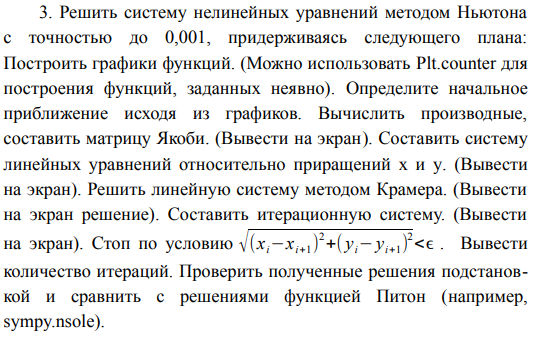

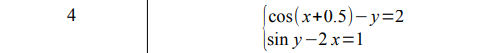

C:\Users\User\AppData\Local\Temp\ipykernel_19720\1260752803.py:10: RuntimeWarning: invalid value encountered in arcsin
  y_vals_eq2 = np.arcsin(2*x_vals + 1)


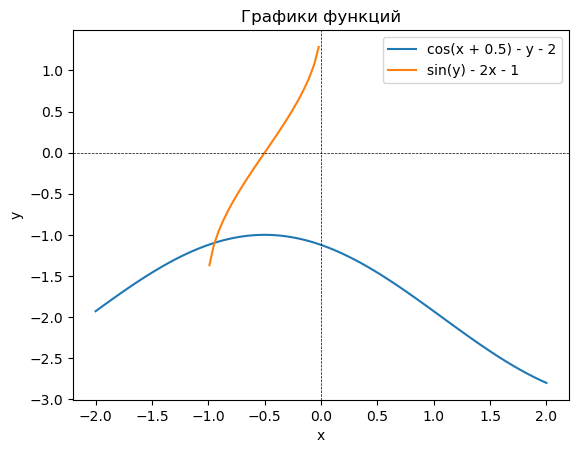

In [41]:
x, y = sp.symbols('x y')

# Определение системы уравнений
eq1 = sp.cos(x + 0.5) - y - 2
eq2 = sp.sin(y) - 2*x - 1

# Построение графиков функций
x_vals = np.linspace(-2, 2, 100)
y_vals_eq1 = np.cos(x_vals + 0.5) - 2
y_vals_eq2 = np.arcsin(2*x_vals + 1)

plt.plot(x_vals, y_vals_eq1, label='cos(x + 0.5) - y - 2')
plt.plot(x_vals, y_vals_eq2, label='sin(y) - 2x - 1')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики функций')
plt.show()

In [42]:
initial_guess = sp.Matrix([0, 0])
f = sp.Matrix([eq1, eq2])
J = f.jacobian([x, y])
print("Матрица Якоби:")
sp.pprint(J, use_unicode=True)

Матрица Якоби:
⎡-sin(x + 0.5)    -1  ⎤
⎢                     ⎥
⎣     -2        cos(y)⎦


In [43]:
delta_x, delta_y = sp.symbols('delta_x delta_y')
system_equations = [eq1.subs([(x, x + delta_x), (y, y + delta_y)]),
                    eq2.subs([(x, x + delta_x), (y, y + delta_y)])]

print("\nСистема линейных уравнений:")
for equation in system_equations:
    sp.pprint(equation, use_unicode=True)


Система линейных уравнений:
-δ_y - y + cos(δₓ + x + 0.5) - 2
-2⋅δₓ - 2⋅x + sin(δ_y + y) - 1


In [44]:
iteration_system = sp.Matrix([x + delta_x, y + delta_y]) - J.inv() * f
print("\nИтерационная система:")
for equation in iteration_system:
    sp.pprint(equation, use_unicode=True)


Итерационная система:
         (-y + cos(x + 0.5) - 2)⋅cos(y)     2⋅(-2⋅x + sin(y) - 1)   
δₓ + x + ────────────────────────────── - ──────────────────────────
            sin(x + 0.5)⋅cos(y) + 2       -2⋅sin(x + 0.5)⋅cos(y) - 4
          (-2⋅x + sin(y) - 1)⋅sin(x + 0.5)   2⋅(-y + cos(x + 0.5) - 2)
δ_y + y - ──────────────────────────────── + ─────────────────────────
              sin(x + 0.5)⋅cos(y) + 2         sin(x + 0.5)⋅cos(y) + 2 


In [45]:
F = sp.cos(x + 0.5) - y - 2
G = sp.sin(y) - 2*x - 1

f_dx = sp.diff(F, x)
f_dy = sp.diff(F, y)
g_dx = sp.diff(G, x)
g_dy = sp.diff(G, y)

J = sp.Matrix([[f_dx, f_dy], [g_dx, g_dy]])
x_0 = 100
y_0 = 100
x_n = 0
y_n = 4
k = 0

while (sp.sqrt((x_0 - x_n)**2 + (y_0 - y_n)**2) >= 0.001):
    k += 1

    J_subs = J.subs([(x, x_n), (y, y_n)])
    rhs_vector = sp.Matrix([F, G])
    rhs_vector_subs = rhs_vector.subs([(x, x_n), (y, y_n)])

    solution = J_subs.inv() * (-rhs_vector_subs)

    print("\nИтерация - ", k)
    print("\ndelta_x =", solution[0].evalf())
    print("delta_y =", solution[1].evalf())

    x_0 = x_n
    y_0 = y_n
    x_n = x_n+solution[0].evalf()
    y_n = y_n+solution[1].evalf()

    print("x =", x_n)
    print("y =", y_n)


print("\nРешение:")
print(f"Количество итераций: {k}")
print(f"Найденые корни уравнения: x = {x_n} y= {y_n}")
roots_solve = sp.nsolve([eq1, eq2], [x, y], [
                        initial_guess[0], initial_guess[1]])
print(
    f"Метод nsolve: Корни уравнения: x = {roots_solve[0]}, y = {roots_solve[1]}")


Итерация -  1

delta_x = 0.943559783156258
delta_y = -5.57478409535458
x = 0.943559783156258
y = -1.57478409535458

Итерация -  2

delta_x = -1.94681131665675
delta_y = 1.63275157491400
x = -1.00325153350049
y = 0.0579674795594165

Итерация -  3

delta_x = -0.0760767390449237
delta_y = -1.21863844477513
x = -1.07932827254542
y = -1.16067096521571

Итерация -  4

delta_x = 0.135032646938363
delta_y = 0.0714267837363121
x = -0.944295625607054
y = -1.08924418147940

Итерация -  5

delta_x = -0.000731845742629506
delta_y = -0.00815673695264326
x = -0.945027471349684
y = -1.09740091843204

Итерация -  6

delta_x = 1.63075514305309e-5
delta_y = 6.77834701306505e-6
x = -0.945011163798253
y = -1.09739414008503

Решение:
Количество итераций: 6
Найденые корни уравнения: x = -0.945011163798253 y= -1.09739414008503
Метод nsolve: Корни уравнения: x = -0.945011163817253, y = -1.09739414021323
